<a href="https://colab.research.google.com/github/Pullsu/Uczenie-maszynowe-w-finansach/blob/Use-Case-1/UMF_Wyk%C5%82ad_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## 04.03.2024
 ## 11.03.2024

 ## Case-study: wykrywanie przestępstw w transakcjach kartą

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import pandas as pd

## Wczytanie danych

In [4]:
dane = pd.read_csv("/content/creditcard.csv")
dane.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# wyświetlenie łącznej liczby 0 i 1
counts = dane['Class'].value_counts()
print(counts)

0    284315
1       492
Name: Class, dtype: int64


In [6]:
X = dane[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
          'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
          'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = dane['Class']
X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
random_state=42
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred = knn.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [10]:
print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)
confusion_matrix(y_test, y_pred)

Accuracy 0.9994148126868609
Precision 0.9051724137931034
Recall 0.7046979865771812


array([[93827,    11],
       [   44,   105]])

Wywołać over i undersampling

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [29]:
y_prob = knn.predict_proba(X_test)[:, 1]

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

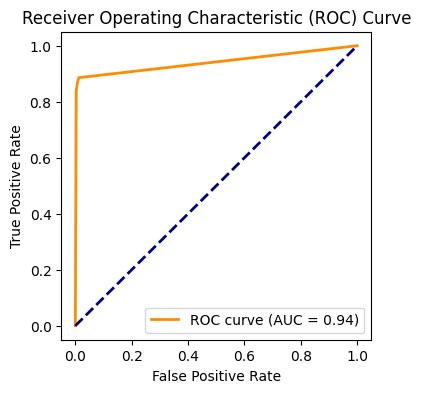

In [34]:
# Wykres krzywej ROC
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [11]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [12]:
# Oversampling inicjacja
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled_over, y_resampled_over = oversampler.fit_resample(X_train, y_train)

In [13]:
# Undersampling inicjacja
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled_under, y_resampled_under = undersampler.fit_resample(X_train, y_train)

In [14]:
# Oversampling

random_state=42
knn.fit(X_resampled_over, y_resampled_over)
y_pred_over = knn.predict(X_test)
accuracy_over = accuracy_score(y_test, y_pred_over)
precision_over = precision_score(y_test, y_pred_over)
recall_over = recall_score(y_test, y_pred_over)
conf_matrix_over = confusion_matrix(y_test, y_pred_over)

print("Results after Oversampling:")
print("Accuracy:", accuracy_over)
print("Precision:", precision_over)
print("Recall:", recall_over)
print("Confusion Matrix:")
print(conf_matrix_over)

Results after Oversampling:
Accuracy: 0.9991594582229457
Precision: 0.71875
Recall: 0.7718120805369127
Confusion Matrix:
[[93793    45]
 [   34   115]]


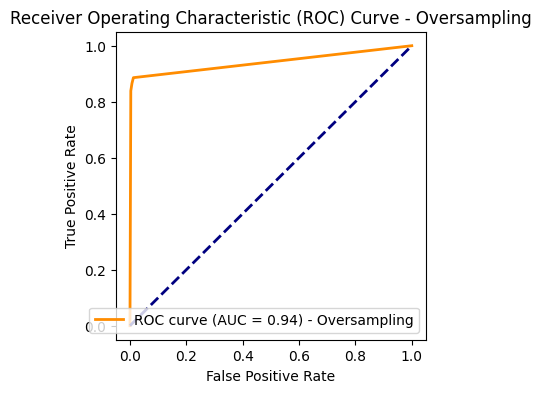

In [36]:
y_prob_over = knn.predict_proba(X_test)[:, 1]

# Obliczenie krzywej ROC
fpr_over, tpr_over, thresholds_over = roc_curve(y_test, y_prob_over)
roc_auc_over = auc(fpr_over, tpr_over)

# Wykres krzywej ROC
plt.figure(figsize=(4, 4))
plt.plot(fpr_over, tpr_over, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f}) - Oversampling'.format(roc_auc_over))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Oversampling')
plt.legend(loc='lower right')
plt.show()

In [15]:
# Undersampling

random_state=42
knn.fit(X_resampled_under, y_resampled_under)
y_pred_under = knn.predict(X_test)
accuracy_under = accuracy_score(y_test, y_pred_under)
precision_under = precision_score(y_test, y_pred_under)
recall_under = recall_score(y_test, y_pred_under)
conf_matrix_under = confusion_matrix(y_test, y_pred_under)

print("Results after Undersampling:")
print("Accuracy:", accuracy_under)
print("Precision:", precision_under)
print("Recall:", recall_under)
print("Confusion Matrix:")
print(conf_matrix_under)

Results after Undersampling:
Accuracy: 0.9419600583059359
Precision: 0.02335609054976644
Recall: 0.87248322147651
Confusion Matrix:
[[88402  5436]
 [   19   130]]


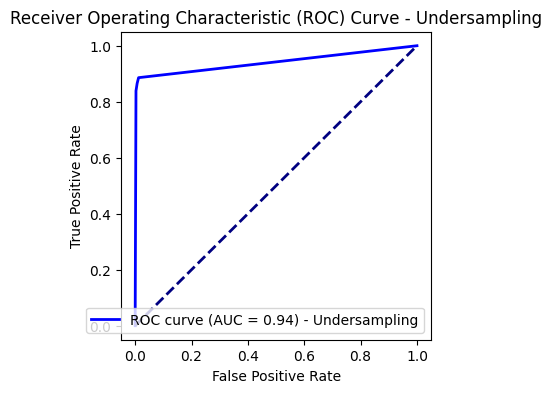

In [39]:
# Obliczenie prawdopodobieństw przynależności do klasy 1 (pozytywnej) dla zbioru testowego
y_prob_under = knn.predict_proba(X_test)[:, 1]

# Obliczenie krzywej ROC
fpr_under, tpr_under, thresholds_under = roc_curve(y_test, y_prob_under)
roc_auc_under = auc(fpr_under, tpr_under)

# Wykres krzywej ROC
plt.figure(figsize=(4, 4))
plt.plot(fpr_under, tpr_under, color='blue', lw=2, label='ROC curve (AUC = {:.2f}) - Undersampling'.format(roc_auc_under))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Undersampling')
plt.legend(loc='lower right')
plt.show()

Tworzenie pipeline'u:

In [24]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [26]:
random_state=42
model = knn
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
#steps = [('over', over), ('under', under), ('model', model)]
pipeline = make_pipeline(over, under, model)

In [27]:
# evaluate pipeline
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     93838
           1       0.16      0.87      0.27       149

    accuracy                           0.99     93987
   macro avg       0.58      0.93      0.63     93987
weighted avg       1.00      0.99      1.00     93987



## Regresja logistyczna:

In [40]:
from sklearn.linear_model import LogisticRegression

In [44]:
# define model
weights = {0.1, 0.2, 1}
model_log_reg = LogisticRegression(solver='lbfgs',
class_weight=weights)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [52]:
weights = {0: 0.1, 1: 0.2}
logreg_model = LogisticRegression(random_state=42, solver='lbfgs', class_weight=weights)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9993935331482013
Precision: 0.8432835820895522
Recall: 0.7583892617449665
Confusion Matrix:
[[93817    21]
 [   36   113]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
